In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = "./telecom_churn.csv"
data = pd.read_csv(data_path)
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Вот текст с изображения:

Набор данных telecom\_churn.csv содержит большое количество признаков.
Для детального изучения воспользуемся методом info() класса DataFrame.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Визуализация количественных признаков
Для представления распределения простого количественного признака подходит обычная гистограмма,
содержащаяся во всех библиотеках.


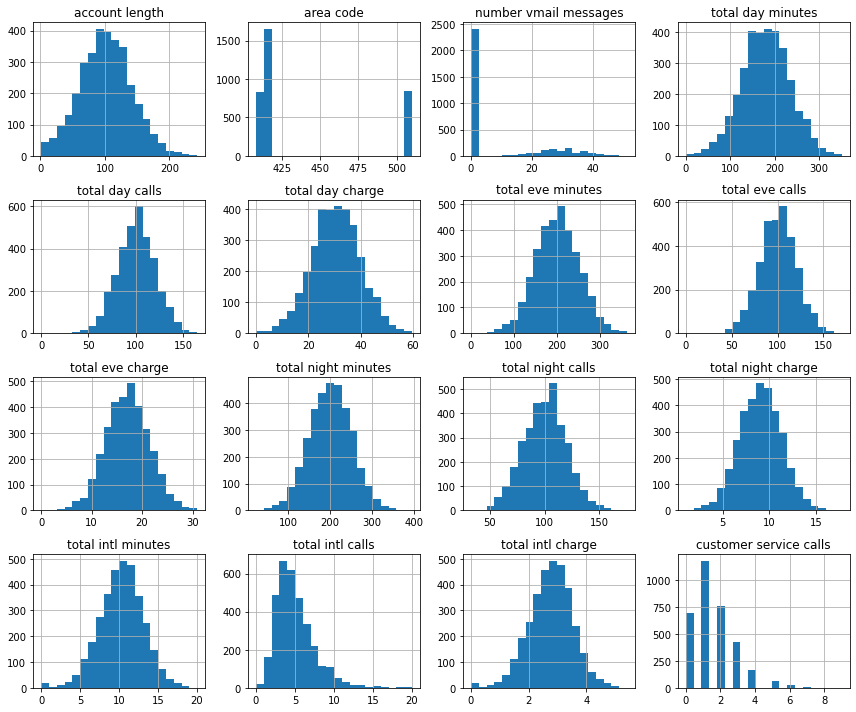

In [4]:
# Только числовые столбцы (исключая bool)
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Построение гистограмм
numeric_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


### Построение гистограммы с использованием matplotlib

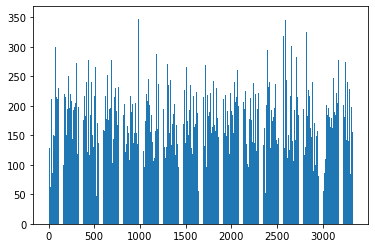

In [6]:
plt.bar(data.index, data['total day minutes'])
plt.show()


### Использование matplotlib для представления распределения значений признака

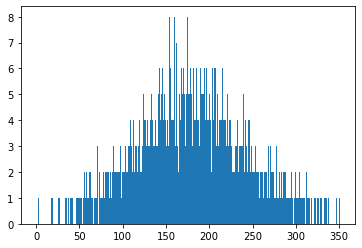

In [7]:
hist = data['total day minutes'].value_counts()
plt.bar(hist.index, hist);


### График «ящик с усами» для отдельного признака

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


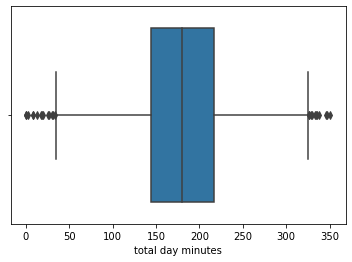

In [8]:
sns.boxplot(data['total day minutes']);


### Использование boxplot для анализа признака для пяти штатов

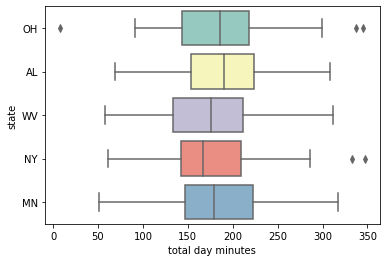

In [12]:
top_data = data[['state', 'total day minutes']]
top_data = top_data.groupby('state').sum()
top_data = top_data.sort_values('total day minutes', ascending=False)
top_data = top_data[:5].index.values

sns.boxplot(y='state',
            x='total day minutes',
            data=data[data.state.isin(top_data)], palette='Set3');


### Категориальные признаки